In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



TypeError: float() argument must be a string or a real number, not 'method'

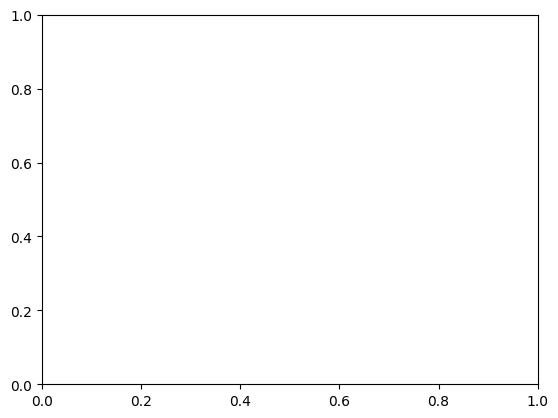

In [12]:
df_temp = pd.read_csv("ADBE.CSV",index_col="date")
df_data = df_temp["adjClose"].dropna
arr_close_prices


ConversionError: Failed to convert value(s) to axis units: array(['May 17, 24', 'May 16, 24', 'May 15, 24', 'May 14, 24',
       'May 13, 24', 'May 10, 24', 'May 09, 24', 'May 08, 24',
       'May 07, 24', 'May 06, 24', 'May 03, 24', 'May 02, 24',
       'May 01, 24', 'April 30, 24', 'April 29, 24', 'April 26, 24',
       'April 25, 24', 'April 24, 24', 'April 23, 24', 'April 22, 24',
       'April 19, 24', 'April 18, 24', 'April 17, 24', 'April 16, 24',
       'April 15, 24', 'April 12, 24', 'April 11, 24', 'April 10, 24',
       'April 09, 24', 'April 08, 24', 'April 05, 24', 'April 04, 24',
       'April 03, 24', 'April 02, 24', 'April 01, 24', 'March 28, 24',
       'March 27, 24', 'March 26, 24', 'March 25, 24', 'March 22, 24',
       'March 21, 24', 'March 20, 24', 'March 19, 24', 'March 18, 24',
       'March 15, 24', 'March 14, 24', 'March 13, 24', 'March 12, 24',
       'March 11, 24', 'March 08, 24', 'March 07, 24', 'March 06, 24',
       'March 05, 24', 'March 04, 24', 'March 01, 24', 'February 29, 24',
       'February 28, 24', 'February 27, 24', 'February 26, 24',
       'February 23, 24', 'February 22, 24', 'February 21, 24',
       'February 20, 24', 'February 16, 24', 'February 15, 24',
       'February 14, 24', 'February 13, 24', 'February 12, 24',
       'February 09, 24', 'February 08, 24', 'February 07, 24',
       'February 06, 24', 'February 05, 24', 'February 02, 24',
       'February 01, 24', 'January 31, 24', 'January 30, 24',
       'January 29, 24', 'January 26, 24', 'January 25, 24',
       'January 24, 24', 'January 23, 24', 'January 22, 24',
       'January 19, 24', 'January 18, 24', 'January 17, 24',
       'January 16, 24', 'January 12, 24', 'January 11, 24',
       'January 10, 24', 'January 09, 24', 'January 08, 24',
       'January 05, 24', 'January 04, 24', 'January 03, 24',
       'January 02, 24'], dtype=object)

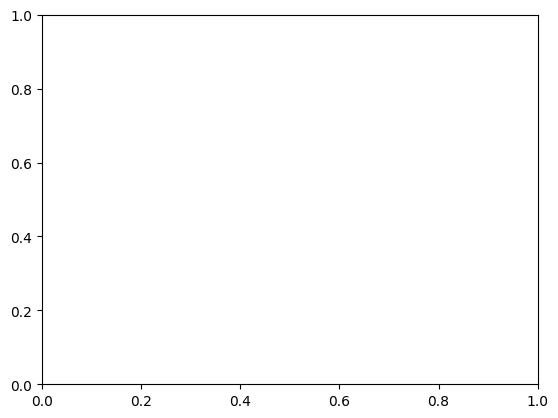